### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

### Importing tweets of officials

In [2]:
presidents_tweets = pd.read_csv('tweets_of_presidents_one_year.csv')
presidents_tweets

,Created_date,Favorite_count,Hashtags,Retweet_count,Source,Tweet,Tweet_ID,User_Mentions,User_Name
0,2020-07-15 16:52:14,28,"[{'text': 'COVID19', 'indices': [57, 65]}]",13,Twitter for Android,"b""Ministerial Statement: Minister of Health Li...",1283444273149620224,[],@EswatiniGovern1
1,2020-07-15 09:28:11,9,[],2,Twitter Web App,b'Ambassador Aragones: \xe2\x80\x9cWhen this p...,1283332522777157632,[],@EswatiniGovern1
2,2020-07-15 09:28:10,11,"[{'text': 'COVID19', 'indices': [95, 103]}]",2,Twitter Web App,b'Ambassador Aragones: \xe2\x80\x9cThis assist...,1283332518964600839,[],@EswatiniGovern1
3,2020-07-15 09:28:09,3,[],0,Twitter Web App,b'PM: \xe2\x80\x9cThis support is significant ...,1283332516586422273,[],@EswatiniGovern1
4,2020-07-15 09:28:08,4,[],0,Twitter Web App,b'Prime Minister: \xe2\x80\x9cThe EU is showin...,1283332512966680578,[],@EswatiniGovern1
...,...,...,...,...,...,...,...,...,...
23089,2020-03-28 17:51:05,13,[],10,Twitter Web App,b'Pour toute information sur coronavirus consu...,1243958803453878273,[],@MSPS_Togo
23090,2020-03-23 10:40:49,47,[],16,Twitter Web App,b'Le premier cas confirm\xc3\xa9 de coronaviru...,1242038584112185344,[],@MSPS_Togo
23091,2020-03-17 11:50:11,2,[],0,Twitter Web App,b'https://t.co/QhnGix1V7f',1239881713922211840,[],@MSPS_Togo
23092,2020-03-17 11:48:52,25,[],17,Twitter Web App,b'Manifestations coronavirus https://t.co/mdjy...,1239881384732344325,[],@MSPS_Togo


In [3]:
user_mentions = presidents_tweets[['Retweet_count', 'User_Mentions','User_Name']]
user_mentions

,Retweet_count,User_Mentions,User_Name
0,13,[],@EswatiniGovern1
1,2,[],@EswatiniGovern1
2,2,[],@EswatiniGovern1
3,0,[],@EswatiniGovern1
4,0,[],@EswatiniGovern1
...,...,...,...
23089,10,[],@MSPS_Togo
23090,16,[],@MSPS_Togo
23091,0,[],@MSPS_Togo
23092,17,[],@MSPS_Togo


In [4]:
with pd.option_context('mode.chained_assignment', None):
    user_mentions['cleaned_mentions'] = user_mentions['User_Mentions'].apply(lambda x: x.split(',')[0].split(':')[-1])


In [5]:
user_mentions

,Retweet_count,User_Mentions,User_Name,cleaned_mentions
0,13,[],@EswatiniGovern1,[]
1,2,[],@EswatiniGovern1,[]
2,2,[],@EswatiniGovern1,[]
3,0,[],@EswatiniGovern1,[]
4,0,[],@EswatiniGovern1,[]
...,...,...,...,...
23089,10,[],@MSPS_Togo,[]
23090,16,[],@MSPS_Togo,[]
23091,0,[],@MSPS_Togo,[]
23092,17,[],@MSPS_Togo,[]


In [6]:
cleaned = user_mentions.loc[user_mentions.cleaned_mentions.str.contains(r'\w+', regex=True, na=False)].reset_index(drop=True)

In [7]:
cleaned

,Retweet_count,User_Mentions,User_Name,cleaned_mentions
0,8,"[{'screen_name': 'EUinEswatini', 'name': 'EU i...",@EswatiniGovern1,'EUinEswatini'
1,2,"[{'screen_name': 'UNFPAEswatini', 'name': 'UNF...",@EswatiniGovern1,'UNFPAEswatini'
2,35,"[{'screen_name': 'TW_Eswatini', 'name': 'Taiwa...",@EswatiniGovern1,'TW_Eswatini'
3,66,"[{'screen_name': 'UEswatini', 'name': 'UNEswat...",@EswatiniGovern1,'UEswatini'
4,14,"[{'screen_name': '_AfricaTimes', 'name': 'Afri...",@EswatiniGovern1,'_AfricaTimes'
...,...,...,...,...
7569,6,"[{'screen_name': 'KGeorgieva', 'name': 'Krista...",@PresidentBio,'KGeorgieva'
7570,333,"[{'screen_name': 'PaulKagame', 'name': 'Paul K...",@PresidentBio,'PaulKagame'
7571,74,"[{'screen_name': 'TEDTalks', 'name': 'TED Talk...",@PresidentBio,'TEDTalks'
7572,102,"[{'screen_name': 'uganda', 'name': 'Marco', 'i...",@PresidentBio,'uganda'


### Calculating the relevance score of officials


In [8]:
cleaned_amount = cleaned['cleaned_mentions'].value_counts().reset_index()
cleaned_amount

,index,cleaned_mentions
0,'CyrilRamaphosa',647
1,'gouvbenin',475
2,'IngoMagazine',287
3,'presidencebf',259
4,'NtareHouse',168
...,...,...
1590,'TEDTalks',1
1591,'SanibonaniD',1
1592,'mohamed_thiombe',1
1593,'o_nar_gueye',1


### Chart showing top 10 relevant officials


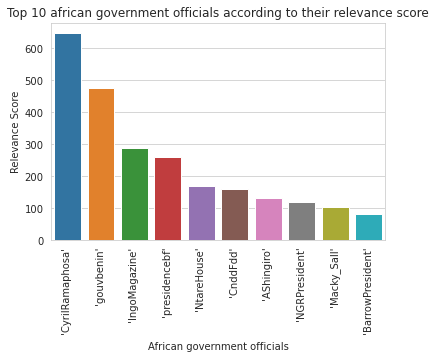

In [9]:
top_10_presidents_relevant = cleaned_amount[:10]
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='index', y='cleaned_mentions', data=top_10_presidents_relevant)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.xticks(rotation=90)
plt.title('Top 10 african government officials according to their relevance score')
plt.xlabel('African government officials')
plt.ylabel('Relevance Score')
plt.savefig('relevance_score.png', bbox_inches="tight", dpi=300)

### Importing the tweets of influencers

In [10]:
influencers_tweets = pd.read_csv('tweets_of_influencers_one_year.csv')
influencers_tweets

,Created_date,Favorite_count,Hashtags,Retweet_count,Source,Tweet,Tweet_ID,User_Mentions,User_Name
0,2020-07-13 19:41:02,20649,[],2730,TweetDeck,b'Actual video footage of me starting off the ...,1282761976343662593,[],@Trevornoah
1,2020-07-11 22:07:04,0,[],92777,Twitter Web App,b'RT @KingBach: https://t.co/Sj2sVP7Gdt',1282073950843858944,"[{'screen_name': 'KingBach', 'name': 'King Bac...",@Trevornoah
2,2020-07-07 14:50:30,43315,[],5993,Twitter Web App,b'When white people take \xe2\x80\x9cbeing an ...,1280514534155923459,[],@Trevornoah
3,2020-07-06 21:54:14,14650,[],1635,Twitter Web App,b'Me at the restaurant after things return to ...,1280258784485572611,[],@Trevornoah
4,2020-06-26 17:02:37,0,[],403,Twitter for iPhone,b'RT @franklinleonard: \xe2\x80\x9cI have rape...,1276561514456113152,"[{'screen_name': 'franklinleonard', 'name': 'F...",@Trevornoah
...,...,...,...,...,...,...,...,...,...
123605,2019-07-14 15:36:11,5,[],0,Twitter Web Client,b'\xe2\x80\x9cI don\xe2\x80\x99t know why I\xe...,1150428788989161472,[],@gettleman
123606,2019-07-14 03:26:42,0,[],26,Twitter for iPhone,b'RT @scroll_in: Elephants in India are changi...,1150245206135984128,"[{'screen_name': 'scroll_in', 'name': 'scroll....",@gettleman
123607,2019-07-11 02:53:05,4,[],0,Twitter Web Client,b'we should ALL do more burpees. https://t.co/...,1149149581801693185,[],@gettleman
123608,2019-07-11 02:52:19,0,[],23,Twitter Web Client,b'RT @halbfinger: Liberal U.S. Jews complain t...,1149149391145451520,"[{'screen_name': 'halbfinger', 'name': 'David ...",@gettleman


In [11]:
user_mentions_influencers = influencers_tweets[['Retweet_count', 'User_Mentions','User_Name']]

In [12]:
with pd.option_context('mode.chained_assignment', None):
    user_mentions_influencers['cleaned_mentions'] = user_mentions_influencers['User_Mentions'].apply(lambda x: x.split(',')[0].split(':')[-1])

In [13]:
user_mentions_influencers

,Retweet_count,User_Mentions,User_Name,cleaned_mentions
0,2730,[],@Trevornoah,[]
1,92777,"[{'screen_name': 'KingBach', 'name': 'King Bac...",@Trevornoah,'KingBach'
2,5993,[],@Trevornoah,[]
3,1635,[],@Trevornoah,[]
4,403,"[{'screen_name': 'franklinleonard', 'name': 'F...",@Trevornoah,'franklinleonard'
...,...,...,...,...
123605,0,[],@gettleman,[]
123606,26,"[{'screen_name': 'scroll_in', 'name': 'scroll....",@gettleman,'scroll_in'
123607,0,[],@gettleman,[]
123608,23,"[{'screen_name': 'halbfinger', 'name': 'David ...",@gettleman,'halbfinger'


### Calculating relevance score of influencers

In [14]:
cleaned_influencers = user_mentions_influencers.loc[user_mentions_influencers.cleaned_mentions.str.contains(r'\w+', regex=True, na=False)].reset_index(drop=True)

In [15]:
cleaned_influencers

,Retweet_count,User_Mentions,User_Name,cleaned_mentions
0,92777,"[{'screen_name': 'KingBach', 'name': 'King Bac...",@Trevornoah,'KingBach'
1,403,"[{'screen_name': 'franklinleonard', 'name': 'F...",@Trevornoah,'franklinleonard'
2,56888,"[{'screen_name': 'SawyerHackett', 'name': 'Saw...",@Trevornoah,'SawyerHackett'
3,4,"[{'screen_name': 'kimlatricejones', 'name': 'K...",@Trevornoah,'kimlatricejones'
4,102293,"[{'screen_name': 'Sensational_Dre', 'name': 'R...",@Trevornoah,'Sensational_Dre'
...,...,...,...,...
71513,767,"[{'screen_name': 'IndianExpress', 'name': 'The...",@gettleman,'IndianExpress'
71514,1,"[{'screen_name': 'AnkurRander', 'name': 'Ankur...",@gettleman,'AnkurRander'
71515,2,"[{'screen_name': 'JCastaneda1212', 'name': 'Jo...",@gettleman,'JCastaneda1212'
71516,26,"[{'screen_name': 'scroll_in', 'name': 'scroll....",@gettleman,'scroll_in'


In [16]:
cleaned_amount_influencers = cleaned_influencers['cleaned_mentions'].value_counts().reset_index()
cleaned_amount_influencers

,index,cleaned_mentions
0,'UlrichJvV',548
1,'EFFSouthAfrica',546
2,'DrZweliMkhize',353
3,'David_Makhura',344
4,'AdvoBarryRoux',308
...,...,...
23141,'SavageLucySA',1
23142,'OfficialCSA',1
23143,'DavidKathoh',1
23144,'junior_danamwa',1


### Calculating relevance score of top infuencers

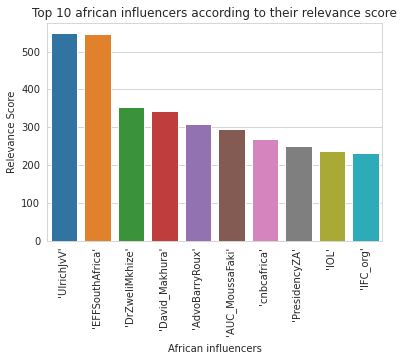

In [17]:
top_10_influencers_relevant = cleaned_amount_influencers[:10]
with sns.axes_style("whitegrid"):
    ax = sns.barplot(x='index', y='cleaned_mentions', data=top_10_influencers_relevant)
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
plt.xticks(rotation=90)
plt.title('Top 10 african influencers according to their relevance score')
plt.xlabel('African influencers')
plt.ylabel('Relevance Score')
plt.savefig('relevance_score_influence.png', bbox_inches="tight", dpi=300)